## Ejercicio 1.1 Implementar modelo de sentiment Analysis con algún algoritmo de Machine Learning Clásico
Como se comentó en el notebook [Tratamiento da datos inicial](00_1_AnalisisDataset1.ipynb) ya tenemos un dataset con una limpieza inicial, pero para esta parte, necesitamos hacer la lemmatización y el borrado de palabras que solo aparecen una vez. Eso será lo primero que haremos.

In [17]:
import numpy as np
import pandas as pd
import os
import io
import matplotlib.pyplot as plt

# Permitir ver columnas completas
pd.set_option('display.max_colwidth', None)

In [18]:
# Función para cargar dataframe
def load_data(ruta, nombre):
    path = os.path.join(ruta, nombre)    
    return pd.read_csv(path, encoding="ISO-8859-1")

In [19]:
# Carga de datos
df = load_data('data', 'dataset_1_limpieza_inicial.csv')
df.head()

,Sentiment,SentimentText
0,0,sad friend
1,0,missed new moon trailer
2,1,oh my god already
3,0,im sooo im gunna cry i have dentist since get crown put mins
4,0,think mi boyfriend cheating trending topic


## Lemmatization
Se opta por la lematización en lugar del Stemming porque es más completa que el Stemmin, ya que este solo se basa en acortar palabras cortando el inicio o el fin de la cadena y la lematización lo hace considerando el análisis morfológico.

In [20]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatizeWord(inputString):
    lemmatizer = WordNetLemmatizer()
    
    for word in inputString.split():
        # Parámetro v para obtener verbos en lugar de sustantivos
        inputString = inputString.replace(word, lemmatizer.lemmatize(word,'v'))

    return inputString

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asens\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
df['SentimentText'] = df['SentimentText'].apply(lambda x: lemmatizeWord(x))

In [22]:
df.shape

(98731, 2)

# Visualización palabras negativas y positivas
Una vez hecho el tratamiento de datos, mostramos dos nubes de etiquetas con las palabras más usadas de ambas categorías.

In [23]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
class wordcloud():
    def wordclouddraw(self,df_pandas,sent):
        if sent == 'positive':
            text_filtered_sentiment = df_pandas['Sentiment'] == 1
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.SentimentText.to_string(index=False, header=False)
            filename = "/HAZE_pos_tweets_spark.png"
        elif sent == 'negative':
            text_filtered_sentiment = df_pandas['Sentiment'] == 0
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.SentimentText.to_string(index=False, header=False)
            filename = "/HAZE_neg_tweets_spark.png"
        else:
            # Mostrar ambos
            text = df_pandas.SentimentText.to_string( index=False, header=False)
            filename = "/HAZE_all_tweets_spark.png"

        file = os.getcwd()

        wordcloud = WordCloud(
            width = 1500,
            height = 1000,
            background_color = 'black',
            stopwords=['haze']
        ).generate(text)

        fig = plt.figure(
            figsize = (20, 10),
            facecolor = 'k',
            edgecolor = 'k')
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad=0)

        wcpath=file+filename

        wordcloud.to_file(wcpath)

## Sentimiento positivo

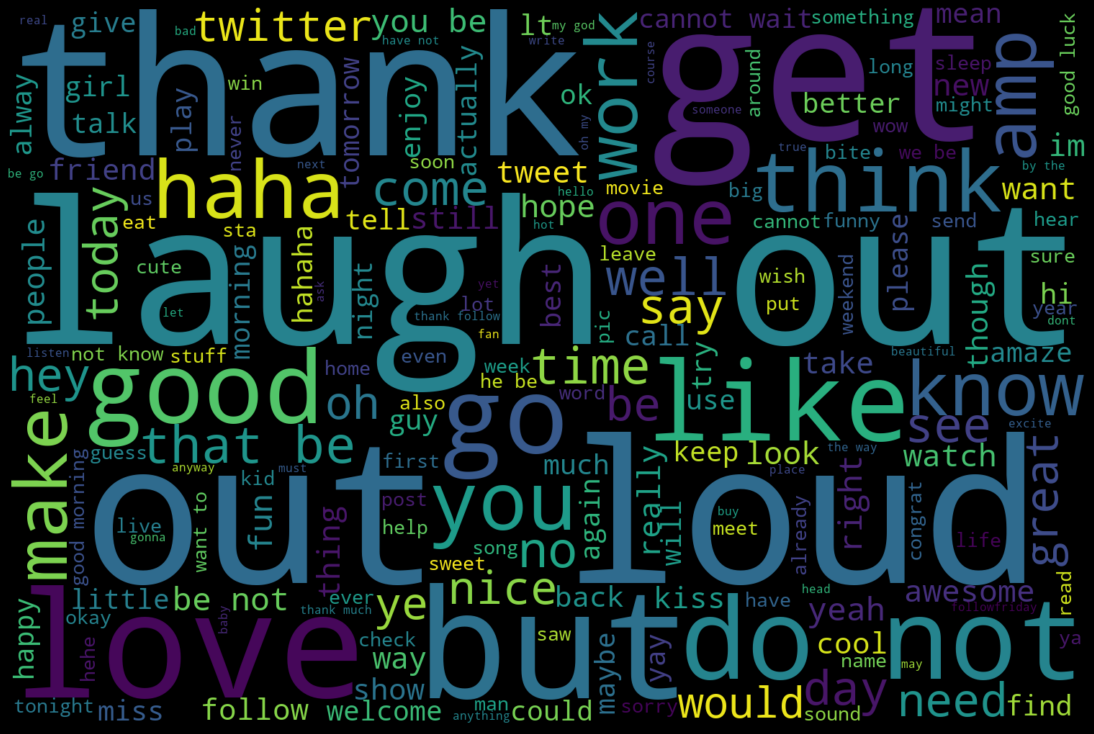

In [25]:
genwordcloud = wordcloud()
genwordcloud.wordclouddraw(df, sent="positive")

## Sentimiento negativo

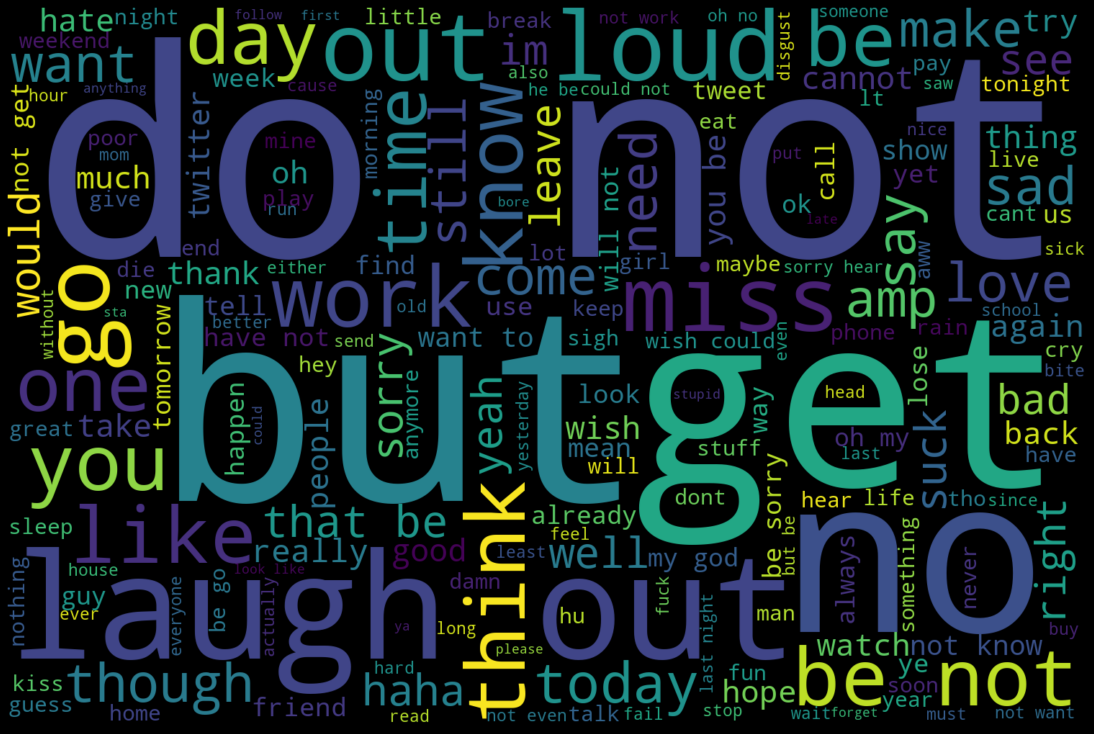

In [26]:
genwordcloud.wordclouddraw(df, sent="negative")